**Hepatitis C PCA**

I have chosen a Hepatitis C Prediction dataset containing lab values from blood donors and Hepatitis C patients including progression to Fibrosis and Cirrhosis.

Data can be found here: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Exploration of the data**

In [2]:
df = pd.read_csv("HepC.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


You can see that there are missing values in the dataset and a mixture of float, int and objects.  Objects are text-based, these will need to be converted and the missing data either dropped or imputed.

In [4]:
df.head(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Can also see that "Unnamed:0" is just a counter (from the description of the dataset it contains the patient ID.)  This is irrelevant so can be removed during cleaning.

In [5]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

Data from ALB, ALP, CHOL and PROT is missing.  ALP and CHOL have the largest number of points missing (18 and 10 respectively.)

In [6]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,122,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,320,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,330,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,414,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,425,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,434,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,499,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
540,541,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,546,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0


Showed the list of rows with missing values and counted them below

In [7]:
df.isnull().any(axis=1).sum()

26

**Description of the data**

Data contains a total of 615 rows and 14 columns.  Of these:

589 rows contain data (615-26 rows that show missing data above)

1 column (Unnamed:0) is patient ID and irrelevant so can be removed.

11 columns contain numerical data (float or int).

2 columns are 'objects' because they are text-based and contain categorical data.

Column details:

1. Patient number
2. Diagnosis:'0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'
3. Age in years
4. Sex (male, female)

The remainder of the features levels of each protein/ enzyme etc present in the blood samples.

5. ALB - Albumin
6. ALP - Alkaline phosphatase
7. ALT - Alanine transaminase
8. AST - Aspartate aminotransferase
9. BIL - Bilirubin
10. CHE - Serum cholinesterase
11. CHOL - Cholesterol
12. CREA - Creatinine
13. GGT - Gamma-glutamyl transferase
14. PROT - Total protein

Units of the measurements aren't listed in the Kaggle dataset or original source - https://archive.ics.uci.edu/dataset/571/hcv+data

**Data Cleaning**

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df['Sex'] = df['Sex'].replace({'m': 1, 'f': 0})

In [10]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

Dropped the patient ID column and replaced "m" and "f" with binary numbers (1 for m, 0 for f.  Grouped the Category into 0 and 1 with Blood Donor being 0 and anything in the progression of Hepatitis C being 1. 

In [11]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Viewing the data again, can now see that Category and Sex are numerical and patient ID removed.

Next I address the missing data.  I considered dropping the rows but as the dataset is relatively small (615 in total) and predominantly affected two columns (ALP and CHOL) I decided to replace them so as not to lose the information in the affected rows.

I have no expertise in hepatatis C or medical data so I don't have enough knowledge to know if interpolation would be appropriate.  Instead I imputed the missing values.  This is often done using measures of central tendency so as not to change the distribution and depends on the distribution of the data already.  For example, the mean is better for Gaussian distribution, whereas the median is more useful with skewed data as it's less sensitive to outliers in the data.  (Kumar, A. 2023)

In [12]:
skew = df.skew(axis='rows')
print(skew)

Category     2.316257
Age          0.267134
Sex         -0.465176
ALB         -0.176768
ALP          4.654921
ALT          5.506114
AST          4.940327
BIL          8.385437
CHE         -0.110233
CHOL         0.375828
CREA        15.169291
GGT          5.632734
PROT        -0.963687
dtype: float64


Explored the skew in the data to choose the measure of central tendency.  The data shows skewing for a few of the columns, particularly CREA and BIL.  As it is skewed I will use the median to impute these values.

In [13]:
df.fillna(df.median(), inplace=True)

In [14]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

Counting the null values again, can see all the missing data has been imputed.  
Now that the data is clean I will visualise the distribution of the data and describe the qualities of the data.

**Data visualisation**

Plotted histograms for each feature to visualise distribution and used describe to show the different descriptive statistics below

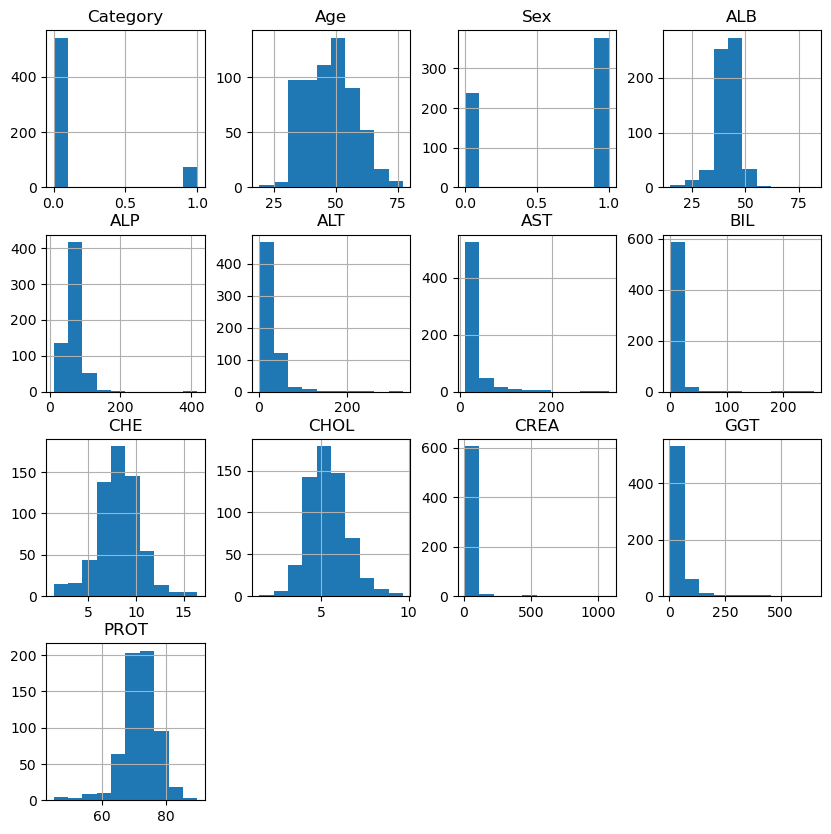

In [15]:
df.hist(figsize = (10,10))
plt.show()

In [16]:
df.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.121951,47.408130,0.613008,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,0.327496,10.055105,0.487458,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,1.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,1.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


From the histograms plotted Age, ALB, CHE, CHOL and PROT look to roughly follow Gaussian distribution and have relatively low standard deviation compared to the other features (10.06, 5.77, 2.19, 1.12 and 5.40 respectively.  This is compared to standard deviation from 49.76 for CREA to 54.66 for GGT.

The remainder of the numerical features (ALP, ALT, AST, BIL, CREA, GGT) are all very skewed with a high standard deviation.  They look to follow a log-normal distribution and therefore I will normalise these columns.  Please see an example below from "Log-normal Distribution - A simple explanation" (Pavlovic, M. 2022)

![Log-normal%20distribution.png](attachment:Log-normal%20distribution.png)

Also plotted the data on violinplots below which visualise both distribution and density of data.

White dot is the median, thick bar is the interquartile range and the thinner line shows the distribution aside from outliers.
When the violin is wider there's a higher probability that a datapoint will take that value.  And vice versa for narrower violins.

In [17]:
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

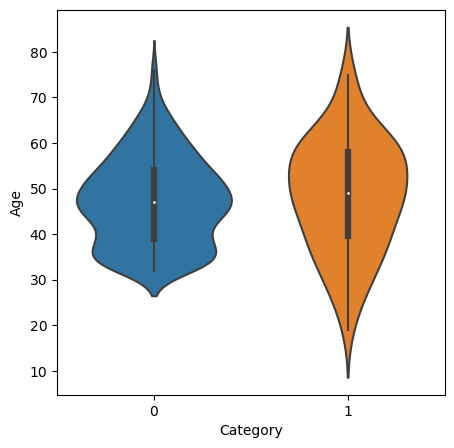

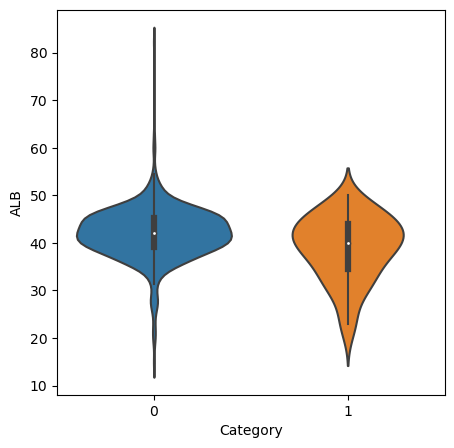

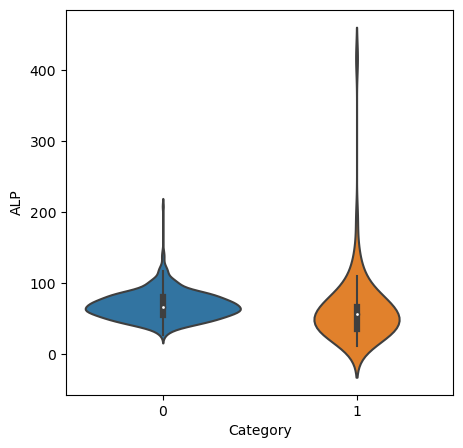

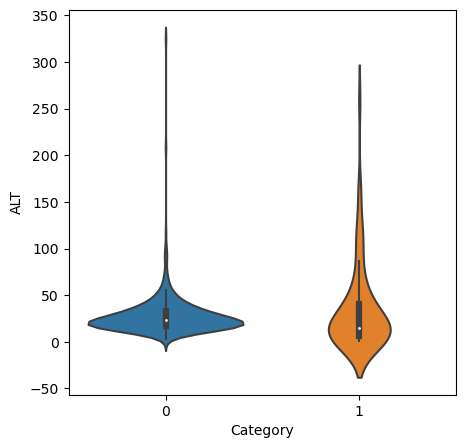

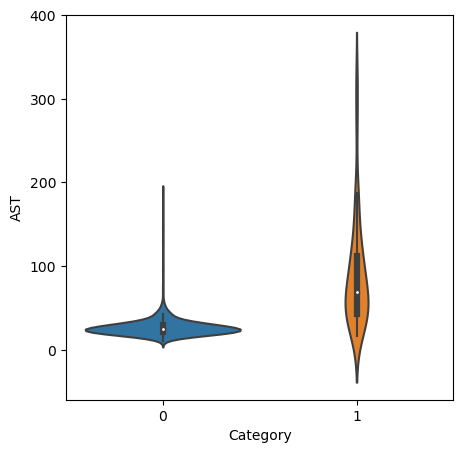

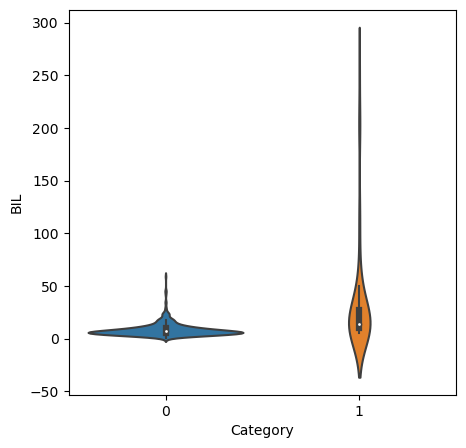

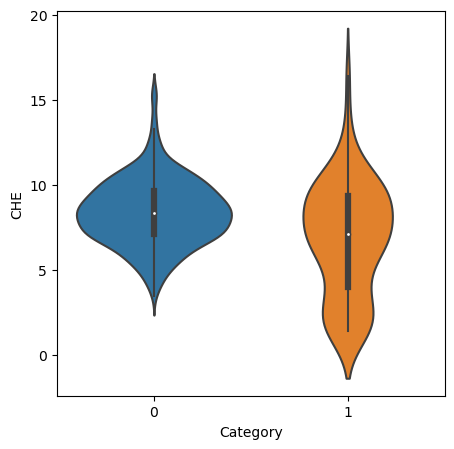

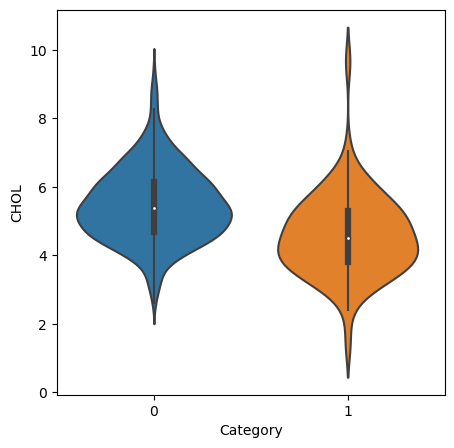

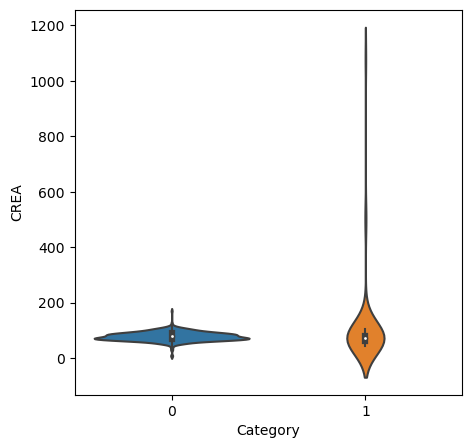

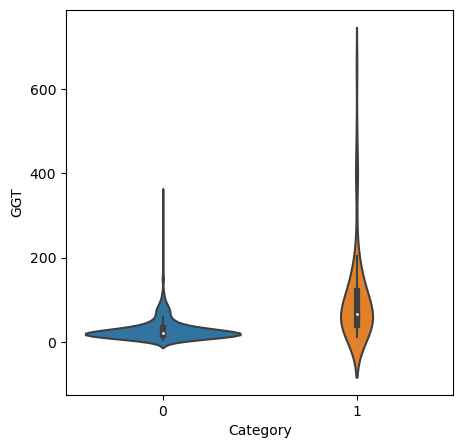

In [18]:
for c in columns:
    plt.figure(figsize = (5, 5))
    sns.violinplot(x='Category',y=c,data=df)

Commentary on the violinplots below as part of the overall commentary

**Data commentary**

The dataset had 615 rows of data with some values missing.  589 rows of complete data, 14 columns total.  1 redundant column, 2 categorical and 11 numerical.

The catgorical data (Category and Sex) are unbalanced as there are far more men(1) than women(0) in the study and far more blood donors (0).  This may be something to consider and address in future analysis..

Removed the redundant patient ID column, changed the categorical columns (Category and Sex) to binary numbers and imputed the missing data.

Some of the features Age, ALB, CHE, CHOL and PROT have relatively low standard deviation and roughly show Gaussian distribution but the remainder of the features are heavily skewed with large standard deviation and require normalisation (see below.)

Looking at the violin plots there's large amounts of overlap for each predictor feature with the target feature, e.g. ALB has a very similar median and density for both Hep C positive patients and blood donors.  There's some evidence of separability for ALP, AST and CHOL but the plots also show a large number of outliers.  As with the data being unbalanced I've not addressed the outliers here but that could be done in further analysis.

**Normalisation**

The skewed data shows evidence of being a log-normal distribution rather than Gaussian (skewed to the left with a long tail to the right) so below I have log normalised the skewed columns' data using base 10.  It doesn't matter which base is used so long as it's consistent across the data.

In [19]:
df['ALP'] = np.log10(df['ALP'])
df['ALT'] = np.log10(df['ALT'])
df['AST'] = np.log10(df['AST'])
df['BIL'] = np.log10(df['BIL'])
df['CREA'] = np.log10(df['CREA'])
df['GGT'] = np.log10(df['GGT'])

In [20]:
df.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.121951,47.408130,0.613008,41.620732,1.810012,1.358367,1.462729,0.903239,8.196634,5.366992,1.887647,1.431557,72.044390
std,0.327496,10.055105,0.487458,5.775935,0.143801,0.286624,0.218916,0.302409,2.205657,1.123499,0.121794,0.333445,5.398238
min,0.000000,19.000000,0.000000,14.900000,1.053078,-0.045757,1.025306,-0.096910,1.420000,1.430000,0.903090,0.653213,44.800000
25%,0.000000,39.000000,0.000000,38.800000,1.723866,1.214844,1.334454,0.724276,6.935000,4.620000,1.826075,1.195900,69.300000
50%,0.000000,47.000000,1.000000,41.950000,1.820858,1.361728,1.413300,0.863323,8.260000,5.300000,1.886491,1.367356,72.200000
75%,0.000000,54.000000,1.000000,45.200000,1.899273,1.519171,1.517196,1.049218,9.590000,6.055000,1.944483,1.604226,75.400000
max,1.000000,77.000000,1.000000,82.200000,2.619719,2.512284,2.510545,2.404834,16.410000,9.670000,3.033062,2.813514,90.000000


Following normalisation we can see that the standard deviation us far lower now for those columns e.g. GGT originally had a standard deviation of 54.66 and following normalisation has a standard deviation of 0.33.  I've also visualised this again below on histograms to show the change in distribution

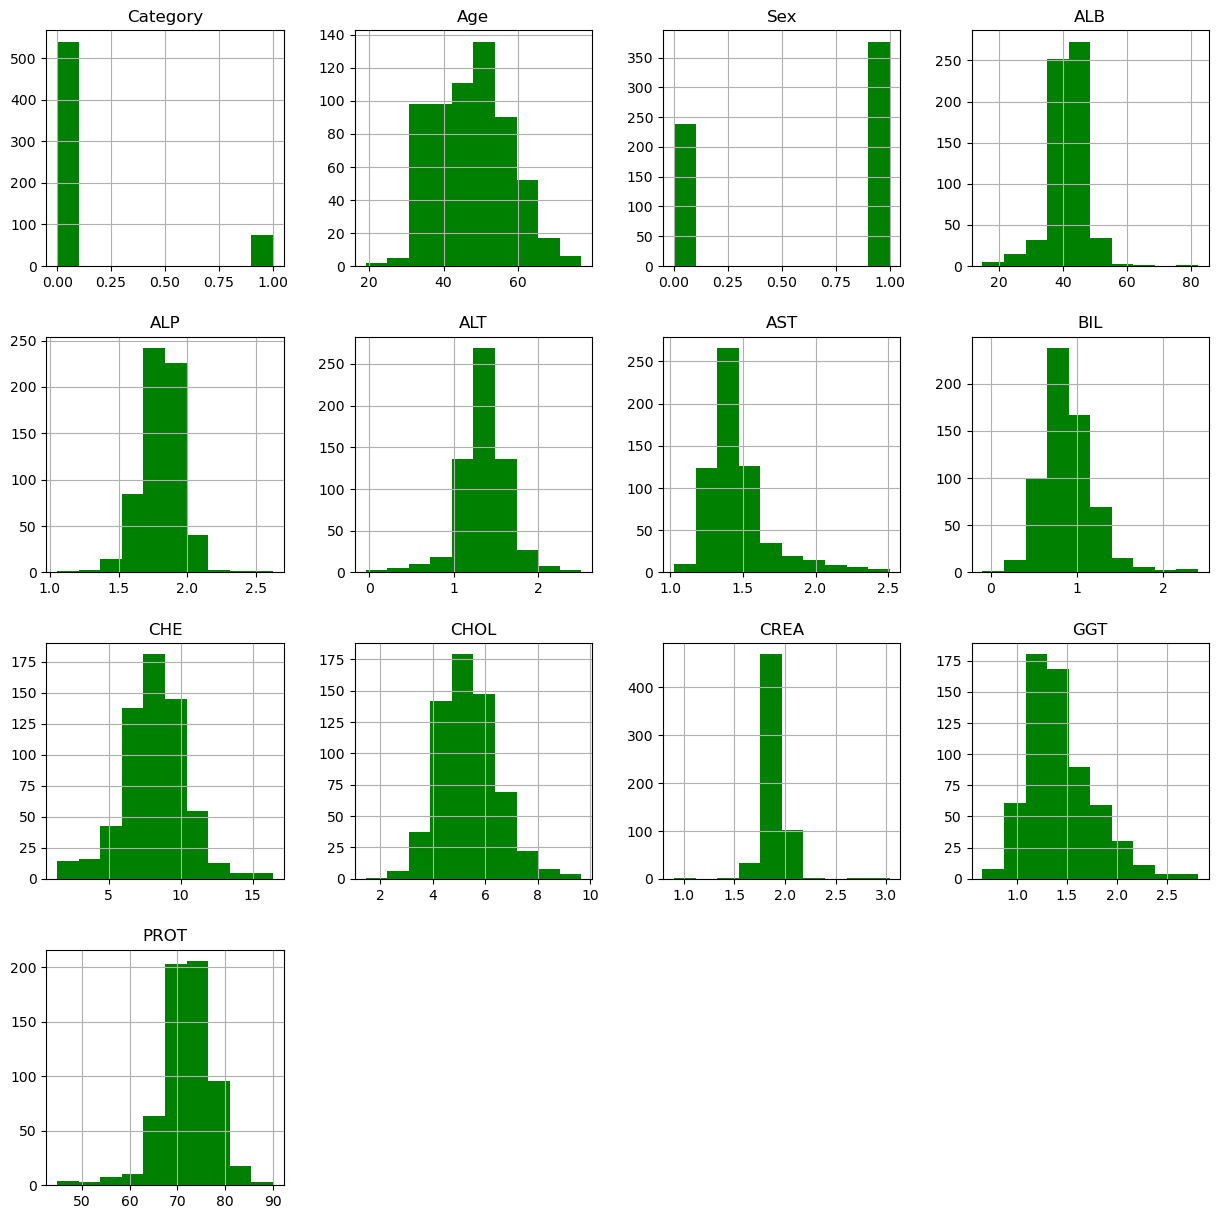

In [21]:
df.hist(figsize = (15,15), color="green")
plt.show()

Following normalisation you can see that the log-normal distributed data(ALB, ALP, AST, BIL, CREA and GGT) looks closer to a Gaussian distribution, particularly for ALT and ALP.

**Choosing the features**

Below I will look at the correlation between each predictive feature and the target feature (Category) using a heatmap as well as violin plots now that the data has been normalized and cleaned.

In [22]:
features = df.corr(method='pearson')

Considered both Pearson and Spearman's correlation coefficients.  In A guide to appropriate use of Correlation coefficient in medical research  the author recommended the use of Pearson for normally distributed data and Spearman for skewed data as it handles outliers better.  (Mukaka, M. 2012)  The data here does still show outliers (see the replotted violin plots) but overall seems to follow Gaussian distribution following normalisation so I decided to use Pearson.  

In [23]:
features

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.037781,0.071663,-0.179609,-0.216606,-0.192843,0.678457,0.453037,-0.230785,-0.266003,0.030993,0.470729,0.084082
Age,0.037781,1.000000,-0.024544,-0.196842,0.178606,-0.065129,0.100669,0.027173,-0.075093,0.123789,-0.057711,0.134663,-0.153672
Sex,0.071663,-0.024544,1.000000,0.146138,0.000033,0.237116,0.225664,0.232455,0.169111,-0.029251,0.316474,0.274047,0.051288
ALB,-0.179609,-0.196842,0.146138,1.000000,-0.081412,0.178744,-0.162494,-0.045425,0.375817,0.204731,0.197726,-0.075992,0.549975
ALP,-0.216606,0.178606,0.000033,-0.081412,1.000000,0.171594,-0.032549,-0.063456,0.098480,0.163276,0.084000,0.185737,-0.017560
ALT,-0.192843,-0.065129,0.237116,0.178744,0.171594,1.000000,0.238854,-0.066408,0.322515,0.203385,-0.008433,0.263682,0.185236
AST,0.678457,0.100669,0.225664,-0.162494,-0.032549,0.238854,1.000000,0.432700,-0.125675,-0.174249,-0.020412,0.555216,0.084131
BIL,0.453037,0.027173,0.232455,-0.045425,-0.063456,-0.066408,0.432700,1.000000,-0.242228,-0.188495,0.124155,0.271770,0.084693
CHE,-0.230785,-0.075093,0.169111,0.375817,0.098480,0.322515,-0.125675,-0.242228,1.000000,0.420215,0.070115,0.020112,0.293041
CHOL,-0.266003,0.123789,-0.029251,0.204731,0.163276,0.203385,-0.174249,-0.188495,0.420215,1.000000,0.031335,0.048766,0.206255


In [24]:
sns.set(rc={'figure.figsize':(12,10)})

In [25]:
new_cmap = sns.diverging_palette(15, 15, as_cmap=True)

Used a diverging colour palette to highlight the positive and negative correlation

<Axes: >

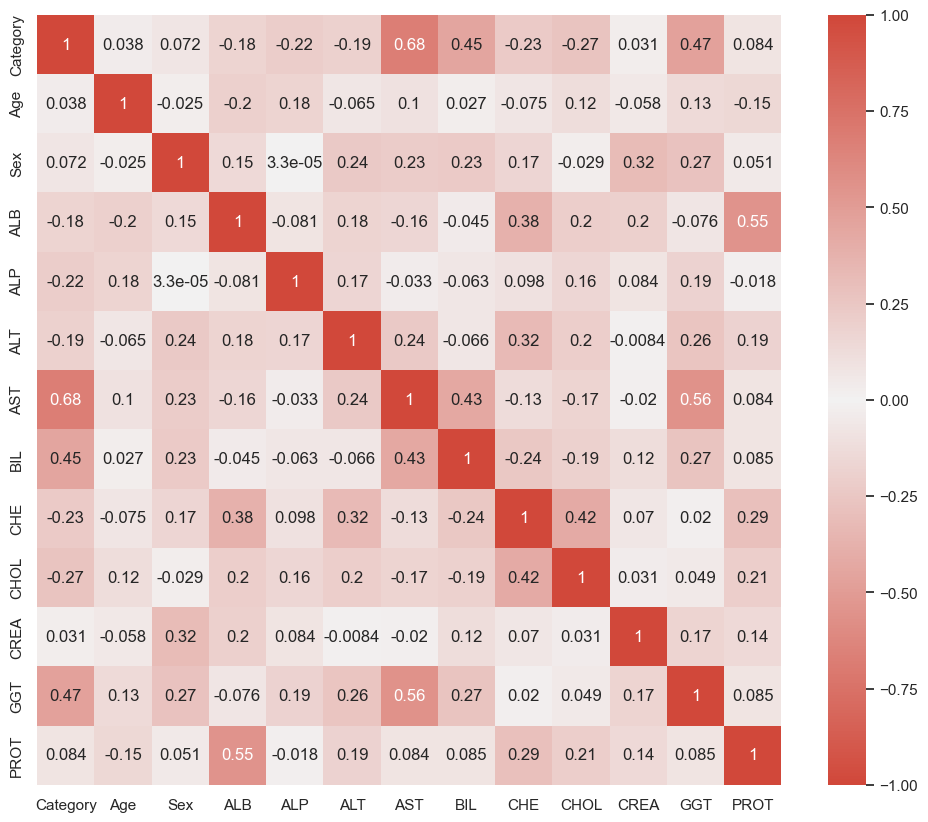

In [26]:
sns.heatmap(features, annot=True, cmap=new_cmap, vmin=-1, vmax=1)


From the above we can see the strongest positive correlation between the target feature (Category) and AST, BIL and GGT (0.68, 0.45 and 0.47) with low positive and negative correlation between Category and the other features.

From the heatmap we can also see there is also correlation between GGT and AST as well as BIL and AST, however as there are no other features as strongly correlated with the outcome, these may still be the best features to use for prediction of the outcome.

In [27]:
selected_features = df[["Category", "AST", "BIL", "GGT"]]

In [28]:
selected_features

,Category,AST,BIL,GGT
0,0,1.344392,0.875061,1.082785
1,0,1.392697,0.591065,1.193125
2,0,1.720986,0.785330,1.521138
3,0,1.354108,1.276462,1.528917
4,0,1.394452,0.982271,1.475671
...,...,...,...,...
610,1,2.042576,1.698970,2.813514
611,1,1.647383,1.301030,1.555094
612,1,1.995635,1.681241,1.807535
613,1,1.792392,1.301030,1.698970


Plotted the heatmap again with the selected features to show the correlation clearly

In [29]:
corr_features = selected_features.corr(method='pearson')

<Axes: >

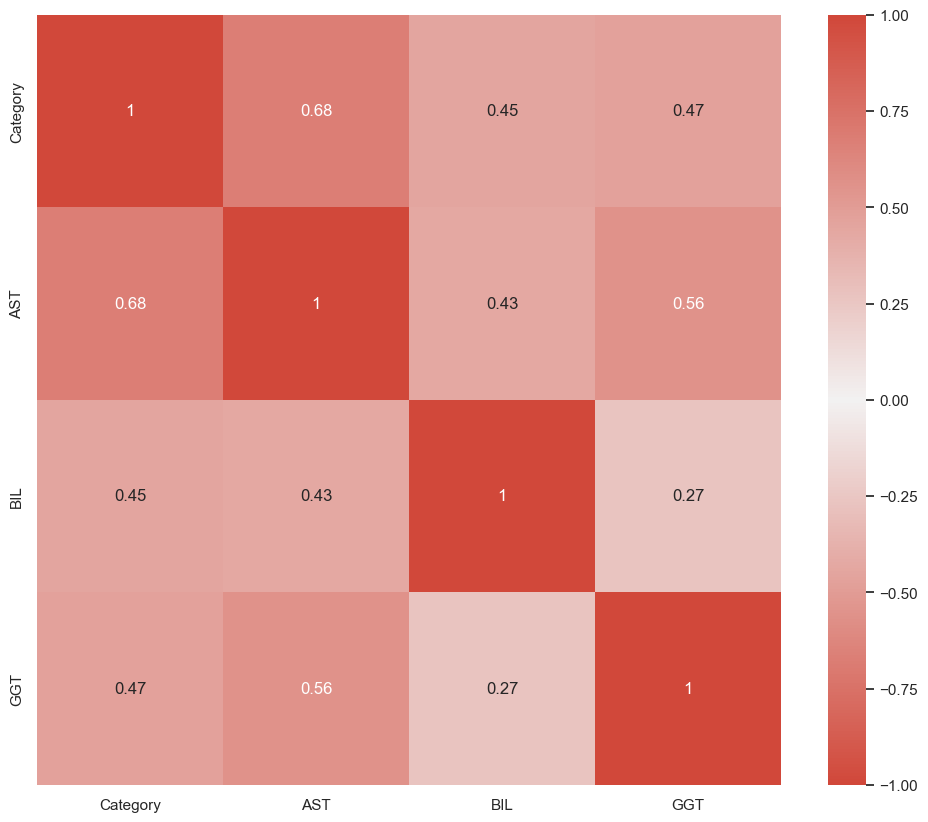

In [30]:
sns.heatmap(corr_features, annot=True, cmap=new_cmap,vmin=-1, vmax=1)

Also plotted the violinplots again to visualise the distribution now that the data has been normalised.

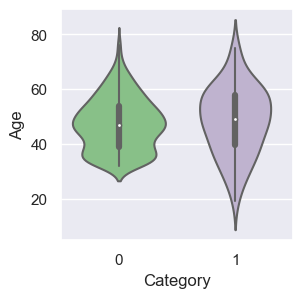

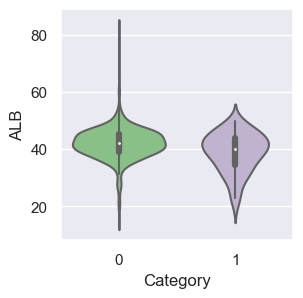

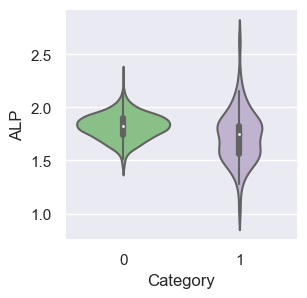

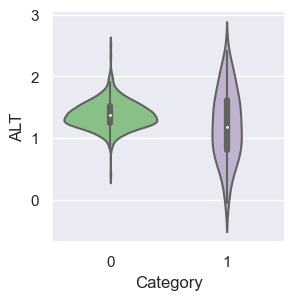

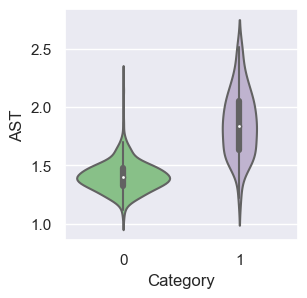

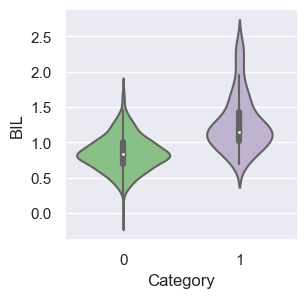

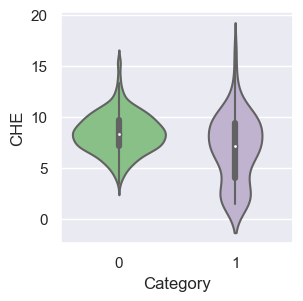

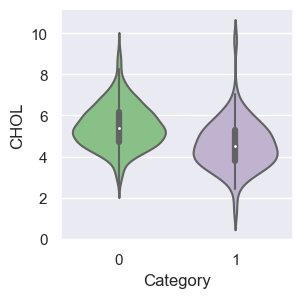

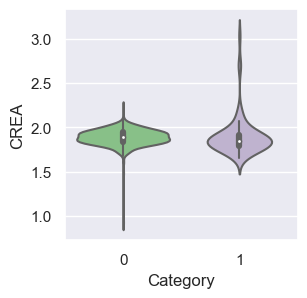

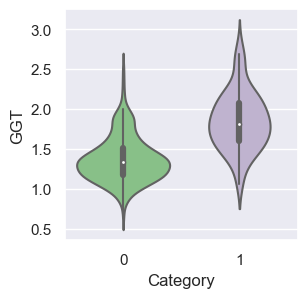

In [31]:
for c in columns:
    plt.figure(figsize = (3, 3))
    sns.violinplot(x='Category',y=c,data=df, palette='Accent')

These now show a little more separation between blood donors and those with HepC for the following variables: AST, BIL, GGT, which suggests that they may be good predictors of the Category.  Looking at AST you can see that the medians of the data for 0 (blood donor) versus 1 (HepC and progressions) are different.  There is some overlap, particularly because of outliers in the blood donor data, but it shows much more separation than for variables such as CREA.  Similarly for BIL and GGT there is a difference in the medians.  For BIL the blood donor group has more outliers.

Given the separation for the two categories in the violinplots for AST, BIL and GGT as well as the correlation between these and the Category, I will use AST, BIL and GGT as my selected features going forward.

**Plotting the selected features on scatterplots**

In [55]:
selected_predictors = df[["AST", "BIL", "GGT"]]
predictor_values = selected_predictors.values
predictor_values.shape

(615, 3)

In [56]:
predictor_values

array([[1.34439227, 0.87506126, 1.08278537],
       [1.39269695, 0.59106461, 1.1931246 ],
       [1.72098574, 0.78532984, 1.52113808],
       ...,
       [1.99563519, 1.68124124, 1.80753503],
       [1.79239169, 1.30103   , 1.69897   ],
       [1.90308999, 1.07918125, 1.53147892]])

In [34]:
target_variable = df[['Category']]
target_values = target_variable.values
target_values.shape

(615, 1)

Separated the predictive features and target.  Both are now arrays of length 615.

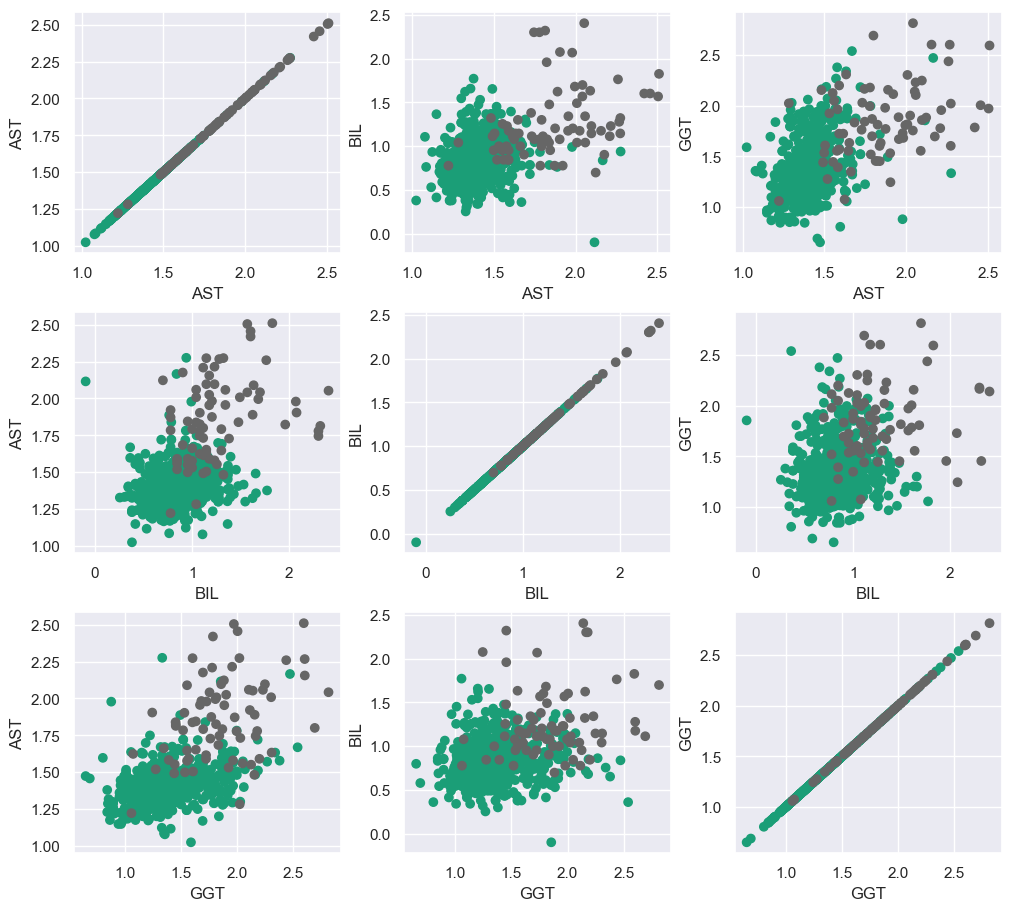

In [35]:
fig,ax=plt.subplots(3, 3, constrained_layout=True, figsize=(10,9))
titles=['AST', 'BIL', 'GGT']
for col1 in range(0,len(titles)):
    for col2 in range(0,len(titles)):
        ax[col1][col2].scatter(predictor_values[:,col1], predictor_values[:,col2], c=target_values, cmap='Dark2')
        ax[col1][col2].set_xlabel(titles[col1])
        ax[col1][col2].set_ylabel(titles[col2])
plt.show()

Plotted each pair of features against each other with the blood donor (0) in green and HepC (1) in grey.  As above for the violinplots, the two outcomes are not fully separable but do show some evidence of clustering, particularly for GGT plotted against AST and AST plotted against BIL.

**Are the chosen dimensions good predictors for the predicted dimension?**

Below I have trained a multi-variate logistic regression model to assess whether the three predictors are a good predictor for the predicted dimension (blood donor or HepC).  For this I followed the steps in Logistic Regression in Python (Stojilkovic, M. no date)

In [36]:
from sklearn.model_selection import train_test_split

Set a seed below and in the model to make the results reproducible.  Splitting the data is done on a random basis so without this there can be differing results when run multiple times.

In [37]:
random_seed = 711

Splitting the data into test and training sets.  1:2 ratio.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(predictor_values, target_values, test_size=0.33, random_state = random_seed)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [40]:
model = LogisticRegression(solver='liblinear', random_state=random_seed)

In [41]:
model.fit(X_train, y_train.ravel())

LogisticRegression(random_state=711, solver='liblinear')

In [43]:
model.score(X_train, y_train)

0.9077669902912622

In [44]:
model.score(X_test, y_test)

0.9359605911330049

Both the training and testing accuracy is high (91% and 94% respectively), and from the above it doesn't look like there's evidence of overfitting/ underfitting as both rates are very similar.  This would give a training classification error of 9% and testing of 6%.

In [42]:
y_pred = model.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[185,   0],
       [ 13,   5]], dtype=int64)

Plotted an ROC curve to visualise the error rate.  ROC curve visualises the performance of a classification model by plotting TPR against FPR obtained by shifting the decision threshold.

We want a high true positive rate and very low false positive rate so the ideal graph would look like a right angle in the top left corner.  The curve below shows 

Used the method from How to Plot a ROC Curve in Python (Step-by-Step) (Zach.  2021)

In [46]:
from sklearn import metrics

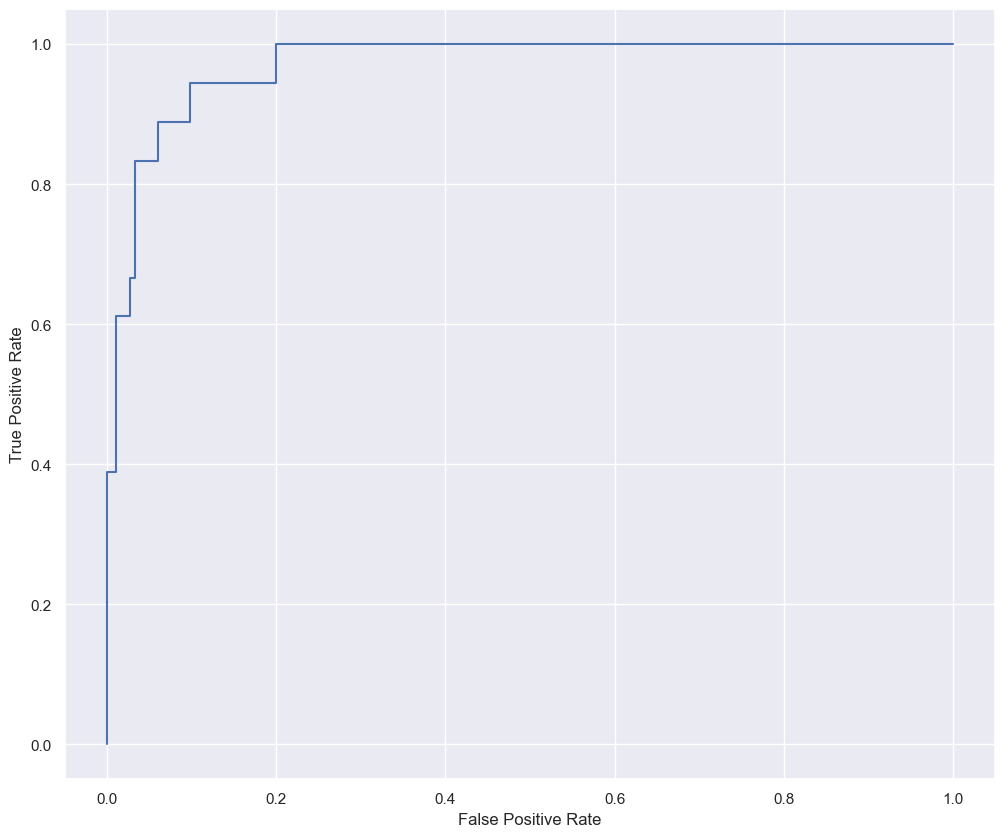

In [47]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Also calculated the area under the ROC curve, which we'd like to be as close to 1 as possible.

In [48]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

0.9708708708708709


This shows that the three features have a very good level of accuracy for prediction according to the logistic regression model.

**PCA**

Below I carried out PCA on the three predictor features and target feature to reduce the dimensionality and plotted the explained variance on a bar chart.  I used the method in "PCA Explained Variance Concepts with Python Example" for this.  (Kumar, A. 2023)

In [49]:
from sklearn.preprocessing import StandardScaler

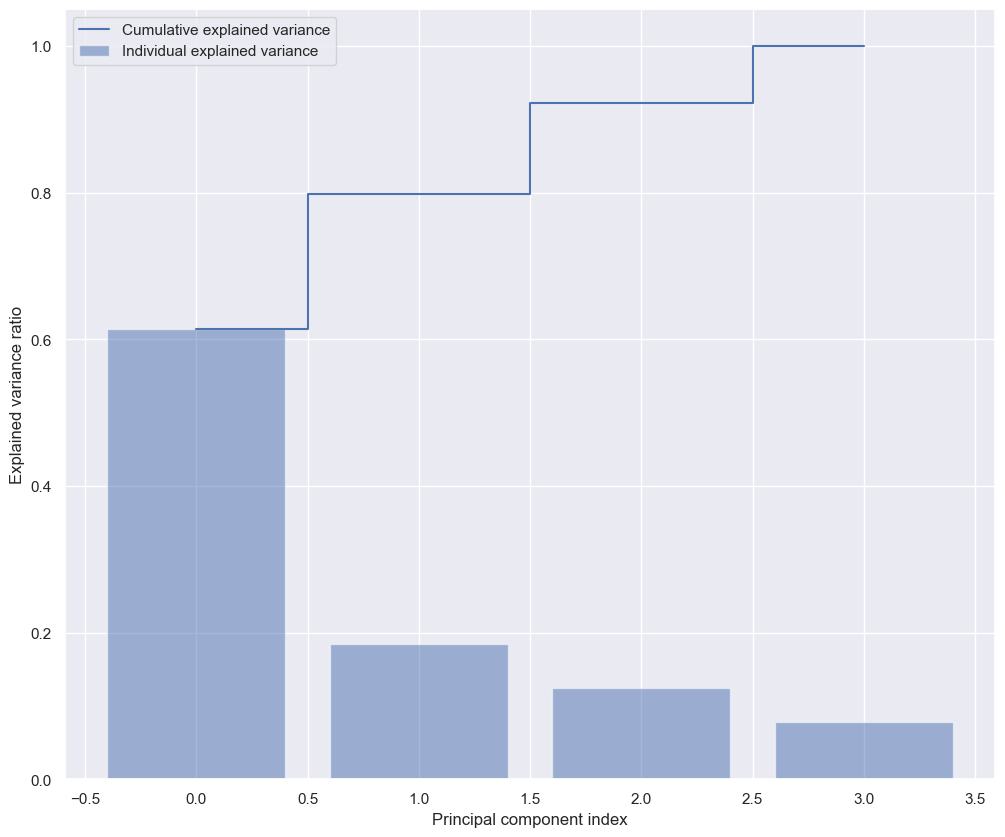

In [50]:
from sklearn.decomposition import PCA
x = selected_features.values

x = StandardScaler().fit_transform(x)

pca = PCA()

x= pca.fit_transform(x)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')


In [51]:
print('Explained variance: {}'.format(pca.explained_variance_ratio_))

Explained variance: [0.61357229 0.18497442 0.12399145 0.07746184]


From the above PC1 explains 61% of the variance in the HepC dataset, PC2 18%, PCA 3 12%, PCA 4 8%.  PCA 1 is by far the most important and the variance explained drops off quite significantly after that.

You can also see that the PCs didn't reduce the number of features, which means that if I were to choose to use fewer features tehn there would be information loss.

In [52]:
PC_Df = pd.DataFrame(data = x
             , columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'])

Plotted the first three PCs on a graph below to visualise.

In [53]:
import mpl_toolkits.mplot3d  

Text(0.5, 0, 'PC3')

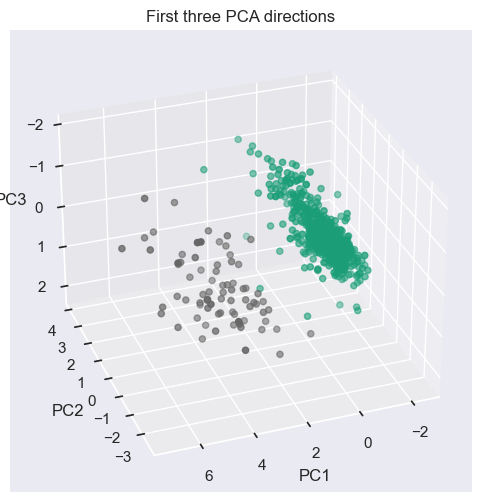

In [54]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    PC_Df['Principal Component 1'],
    PC_Df['Principal Component 2'],
    PC_Df['Principal Component 3'],
    c=target_values, 
    cmap='Dark2',
)

ax.set_title("First three PCA directions")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


**What motivated your choice of those three predictor dimension? Are there
alternatives that could be explored?
Self-assessment: do your selection and the PCA provide a “good”
dimensionality reduction?**

I choose the three features (AST, BIL and GGT) as they showed the strongest correlation with the outcome (blood donor or HepC), though they also showed colinearity so if other features had showed that correlation with the outcome I would have considered those.  They also showed some separation when plotted against each other on scatterplots and violinplots.  Within this dataset I could explore the other features but given the lower correlation and overlap when plotted I don't think this would improve the predictive ability.

The selection doesn't provide a good dimensionality reduction as all four features are shown to be necessary to explain the variance in the full dataset.  However, I have plotted the first three PCs above and you can see evidence of separation that these features are good for prediction.

**References**

Kumar, A. (2023).  *PCA Explained Variance Concepts with Python Example*.  Available from: https://vitalflux.com/pca-explained-variance-concept-python-example/#What_is_Explained_Variance [accessed 23 June 2023]

Kumar, A. (2023) *Python - Replace Missing Values with Mean, Median & Mode*[online].  Available from: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=df.mean())-,Impute%20%2F%20Replace%20Missing%20Values%20with%20Median,for%20replacing%20the%20missing%20values [accessed 12 June 2023]

Mukaka, M. (2012).  A guide to appropriate use of Correlation coefficient in medical research [online], v.24(3).  Available from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/ [accessed 15 June 2023]

Pavlovic, M. (2022) *Log-normal Distribution - A simple explanation*[online].  Available from: https://towardsdatascience.com/log-normal-distribution-a-simple-explanation-7605864fb67c [accessed 13 June 2023]

Stojilkovic, M. (no date). *Logistic Regression in Python*[online].  Available from: https://realpython.com/logistic-regression-python/#logistic-regression-in-python [accessed 20 June 2023]

Zach.  (2021).   *How to Plot a ROC Curve in Python (Step-by-Step)*.  Available from: https://www.statology.org/plot-roc-curve-python/ [accessed 20 June 2023]